# Hypothesis: 
## More students that intend to major or minor in computer science expect to earn an 'A' than non-computer science students.

### Step-00: Read in the csv & convert it to a column-oriented data table.

In [161]:
from data_utils import read_csv_rows, columnar

data_rows: list[dict[str, str]] = read_csv_rows('../../data/survey.csv')
columns: dict[str, list[str]] = columnar(data_rows)

print(f"{len(data_rows)} rows")
print(f"{len(data_rows[0].keys())} columns")

502 rows
36 columns


### Step-01: Select just the "comp_major" & "grade" columns. Below are the first ten rows of each column.

In [162]:
from tabulate import tabulate
from data_utils import head, select

subset: dict[str, list[str]] = select(columns, ["comp_major", "grade"])

tabulate(head(subset, 10), subset.keys(), "html")

comp_major,grade
No,A
No,B
No,B
No,A
Yes - BS,A
Yes - Minor,A
No,A
No,C
No,B
No,A


### Step-02: Filter out the expected grades of computer science majors & minors into one variable, & the expected grades of non-computer science students into another variable.

> ### Part-00: Create a mask to identify cs students (True) and non-cs students (False).

In [163]:
def is_cs(column: list[str], exclusion: str) -> list[bool]:
    result: list[bool] = []
    for item in column:
        # Include everything but the 'No's
        result.append(item != exclusion)
    return result

def not_cs(column: list[str], exclusion: str) -> list[bool]:
    result: list[bool] = []
    for item in column:
        # Include only the 'No's.
        result.append(item == exclusion)
    return result

only_cs_mask: list[bool] = is_cs(subset['comp_major'], 'No')
print(f"CS Majors or Minors: {only_cs_mask}")

only_non_cs_mask: list[bool] = not_cs(subset['comp_major'], 'No')
print(f"Non-CS Students: {only_non_cs_mask}")


CS Majors or Minors: [False, False, False, False, True, True, False, False, False, False, False, False, False, False, False, True, True, False, True, False, False, True, True, False, False, False, False, False, False, True, True, True, False, False, True, False, False, True, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, True, True, False, False, False, True, True, False, False, True, False, True, False, False, False, False, False, False, True, False, True, True, False, True, False, False, True, True, False, True, False, False, True, False, False, False, False, False, False, False, False, False, False, True, True, True, False, False, False, True, False, True, True, True, False, True, False, False, False, False, False, False, True, False, True, False, True, True, False, True, True, True, False, False, False, True, True, False, False, False, False, False, True, True, False, False, Fal

> ### Part-01: Use the mask to filter the data from the original 'comp_major' & 'grade' columns. One variable will contain the expected grades of cs students & another variable will contain the expected grades of non-cs students.

In [164]:
def masked(col: list[str], mask: list[bool]) -> list[str]:
    result: list[str] = []
    for i in range(len(mask)):
        if mask[i]:
            result.append(col[i])
    return result

grades_of_cs_students: list[str] = masked(subset['grade'], only_cs_mask)
print(f"Expected Grades of CS Students: {grades_of_cs_students}")

grades_of_non_cs_students: list[str] = masked(subset['grade'], only_non_cs_mask)
print(f"Expected Grades of Non-CS Students: {grades_of_non_cs_students}")

Expected Grades of CS Students: ['A', 'A', 'A', 'B', 'B', 'A', 'B', 'B', 'B', 'B', 'B', 'A', 'A', 'B', 'A', 'B', 'B', 'A', 'A', 'B', 'A', 'B', 'A', 'A', 'A', 'B', 'B', 'B', 'B', 'A', 'A', 'A', 'A', 'A', 'C', 'A', 'A', 'B', 'A', 'A', 'B', 'A', 'C', 'C', 'B', 'A', 'B', 'B', 'A', 'A', 'B', 'B', 'A', 'B', 'B', 'C', 'A', 'B', 'B', 'B', 'B', 'A', 'A', 'A', 'B', 'A', 'A', 'B', 'A', 'A', 'B', 'A', 'A', 'A', 'B', 'A', 'B', 'A', 'A', 'B', 'B', 'A', 'D', 'B', 'B', 'B', 'A', 'C', 'A', 'B', 'B', 'B', 'A', 'B', 'A', 'B', 'A', 'A', 'A', 'B', 'B', 'A', 'A', 'A', 'B', 'A', 'A', 'A', 'B', 'A', 'A', 'A', 'C', 'B', 'A', 'A', 'B', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'B', 'B', 'A', 'B', 'A', 'A', 'A', 'B', 'B', 'A', 'A', 'B', 'C', 'A', 'A', 'C', 'A', 'A', 'A', 'A', 'A', 'B', 'B', 'B', 'A', 'A', 'B', 'B', 'B', 'A', 'B', 'B', 'B', 'C', 'A', 'A', 'A', 'A', 'B', 'B', 'A', 'A', 'B', 'A', 'A', 'A', 'A']
Expected Grades of Non-CS Students: ['A', 'B', 'B', 'A', 'A', 'C', 'B', 'A', 'B', 'A', 'A', 'A', 'A', 'B', 'B', 

### Step-03: Count the frequencies of expected grades in the non-CS and CS groups.

In [171]:
from data_utils import count

count_cs = count(grades_of_cs_students)
count_non_cs = count(grades_of_non_cs_students)

print(count(grades_of_cs_students))
print(count(grades_of_non_cs_students))

{'A': 93, 'B': 68, 'C': 9, 'D': 1}
{'A': 144, 'B': 143, 'C': 38, 'D': 6}


### Step-04: Convert the frequencies to percentages to better compare the two groups.

In [176]:
values_cs = count_cs.values()
total_cs = sum(values_cs)
print(total_cs)

values_non_cs = count_non_cs.values()
total_non_cs = sum(values_non_cs)
print(total_non_cs)

prcnt_cs: dict[str, int] = {}
prcnt_non_cs: dict[str, int] = {}

for key in count_cs:
    prcnt_cs[key] = round((count_cs[key]/total_cs) * 100.0)

print(prcnt_cs)

for key in count_non_cs:
    prcnt_non_cs[key] = round((count_non_cs[key]/total_non_cs * 100.0))

print(prcnt_non_cs)

171
331
{'A': 54, 'B': 40, 'C': 5, 'D': 1}
{'A': 44, 'B': 43, 'C': 11, 'D': 2}


### Step-05: Display the results of the previous cell with bar charts.

Text(0.5, 1.0, 'Expected Grade Percentages of Non-computer Science Students')

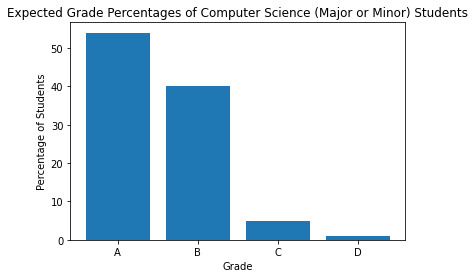

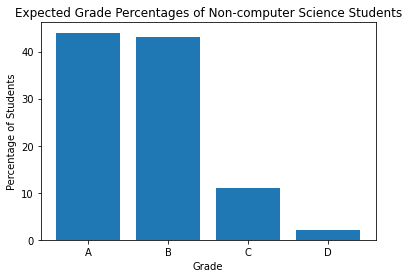

In [177]:
from matplotlib import pyplot as plt

figure, axes = plt.subplots(1)
axes.bar(prcnt_cs.keys(), prcnt_cs.values())

plt.xlabel('Grade')
plt.ylabel('Percentage of Students')
plt.title('Expected Grade Percentages of Computer Science (Major or Minor) Students')

figure, axes = plt.subplots(1)
axes.bar(prcnt_non_cs.keys(), prcnt_non_cs.values())

plt.xlabel('Grade')
plt.ylabel('Percentage of Students')
plt.title('Expected Grade Percentages of Non-computer Science Students')

### Step-06: Display the results of cell-32 with pie charts.

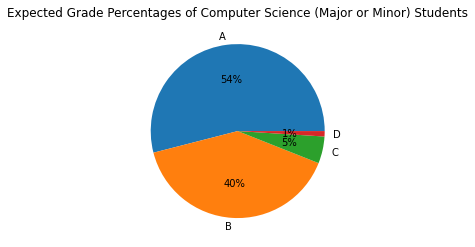

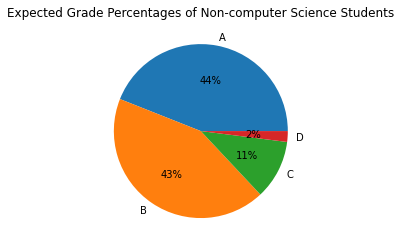

In [178]:
import matplotlib
matplotlib.axes.Axes.pie
matplotlib.pyplot.pie

# prcnt_cs pie chart
labels_cs = prcnt_cs.keys()
sizes_cs = prcnt_cs.values()

fig1, ax1 = plt.subplots()
ax1.pie(sizes_cs, labels=labels_cs, autopct='%1.0f%%')
plt.title('Expected Grade Percentages of Computer Science (Major or Minor) Students') 
plt.show()

# prcnt_non_cs pie chart
labels_non_cs = prcnt_non_cs.keys()
sizes_non_cs = prcnt_non_cs.values()

fig2, ax2 = plt.subplots()
ax2.pie(sizes_non_cs, labels=labels_non_cs, autopct='%1.0f%%')
plt.title('Expected Grade Percentages of Non-computer Science Students')
plt.show()

# Conclusion:

## The analysis supports the hypothesis that more computer science students expect to earn an 'A' than non-computer science students.